In [92]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\bigmo\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [93]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\bigmo\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [94]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\bigmo\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [95]:
%pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\bigmo\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [96]:
%pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\bigmo\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [97]:
%pip install -U scikit-learn numpy seaborn matplotlib scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\bigmo\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [98]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
import sklearn
import os
from scipy.stats import linregress
from matplotlib.pyplot import figure
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

os.getcwd()

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [99]:
# Combine the data into a single dataset
Combined_data = pd.merge(mouse_metadata, study_results, how='outer')

In [100]:
# Display the data table for preview
Combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [101]:
# Checking the number of mice.
mice=Combined_data["Mouse ID"].value_counts()
number_of_mice=len(mice)
number_of_mice

249

In [102]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = Combined_data.loc[Combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

In [103]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mouse_id=pd.DataFrame(duplicate_mice)
all_duplicate_mouse_id

,0
0,g989


In [104]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = Combined_data[Combined_data['Mouse ID'].isin(duplicate_mice)==False]

In [105]:
# Checking the number of mice in the clean DataFrame.
clean_mice=clean_df["Mouse ID"].value_counts()
clean_number_of_mice=len(clean_mice)
clean_number_of_mice

248

In [106]:
import pandas as pd

# Assuming Tumor Volume (mm3) needs to be converted to numeric
clean_df['Tumor Volume (mm3)'] = pd.to_numeric(clean_df['Tumor Volume (mm3)'], errors='coerce')

# Check for missing or invalid data
missing_data = clean_df['Tumor Volume (mm3)'].isnull().sum()
if missing_data > 0:
    print(f"Warning: There are {missing_data} missing or invalid values in 'Tumor Volume (mm3)'. These will be excluded from calculations.")

# Generate summary statistics
regimen_mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
regimen_median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
regimen_variance = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
regimen_std = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
regimen_sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Combine results into a summary table
summary_stats = pd.DataFrame({
    'Mean': regimen_mean,
    'Median': regimen_median,
    'Variance': regimen_variance,
    'Standard Deviation': regimen_std,
    'SEM': regimen_sem
})

print(summary_stats)

                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


C:\Users\bigmo\AppData\Local\Temp\ipykernel_9248\1186112136.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Tumor Volume (mm3)'] = pd.to_numeric(clean_df['Tumor Volume (mm3)'], errors='coerce')


In [107]:
summary_stats_table = pd.DataFrame({"Mean": regimen_mean, "Median":regimen_median, "Variance":regimen_variance, "Standard Deviation": regimen_std, "SEM": regimen_sem})

summary_stats_table

summary_stats_table.to_csv("fileOne.csv", index=False, header=True)

In [108]:
import pandas as pd

file_one_df = pd.read_csv('fileOne.csv')

# Display the DataFrame
file_one_df

,Mean,Median,Variance,Standard Deviation,SEM
0,40.675741,41.557809,24.947764,4.994774,0.329346
1,52.591172,51.776157,39.290177,6.268188,0.469821
2,52.884795,51.820584,43.128684,6.567243,0.492236
3,55.235638,53.698743,68.553577,8.279709,0.603860
4,54.331565,52.509285,66.173479,8.134708,0.596466
5,54.033581,52.288934,61.168083,7.821003,0.581331
6,52.320930,50.446266,43.852013,6.622085,0.544332
7,40.216745,40.673236,23.486704,4.846308,0.320955
8,54.233149,52.431737,59.450562,7.710419,0.573111
9,53.236507,51.818479,48.533355,6.966589,0.516398


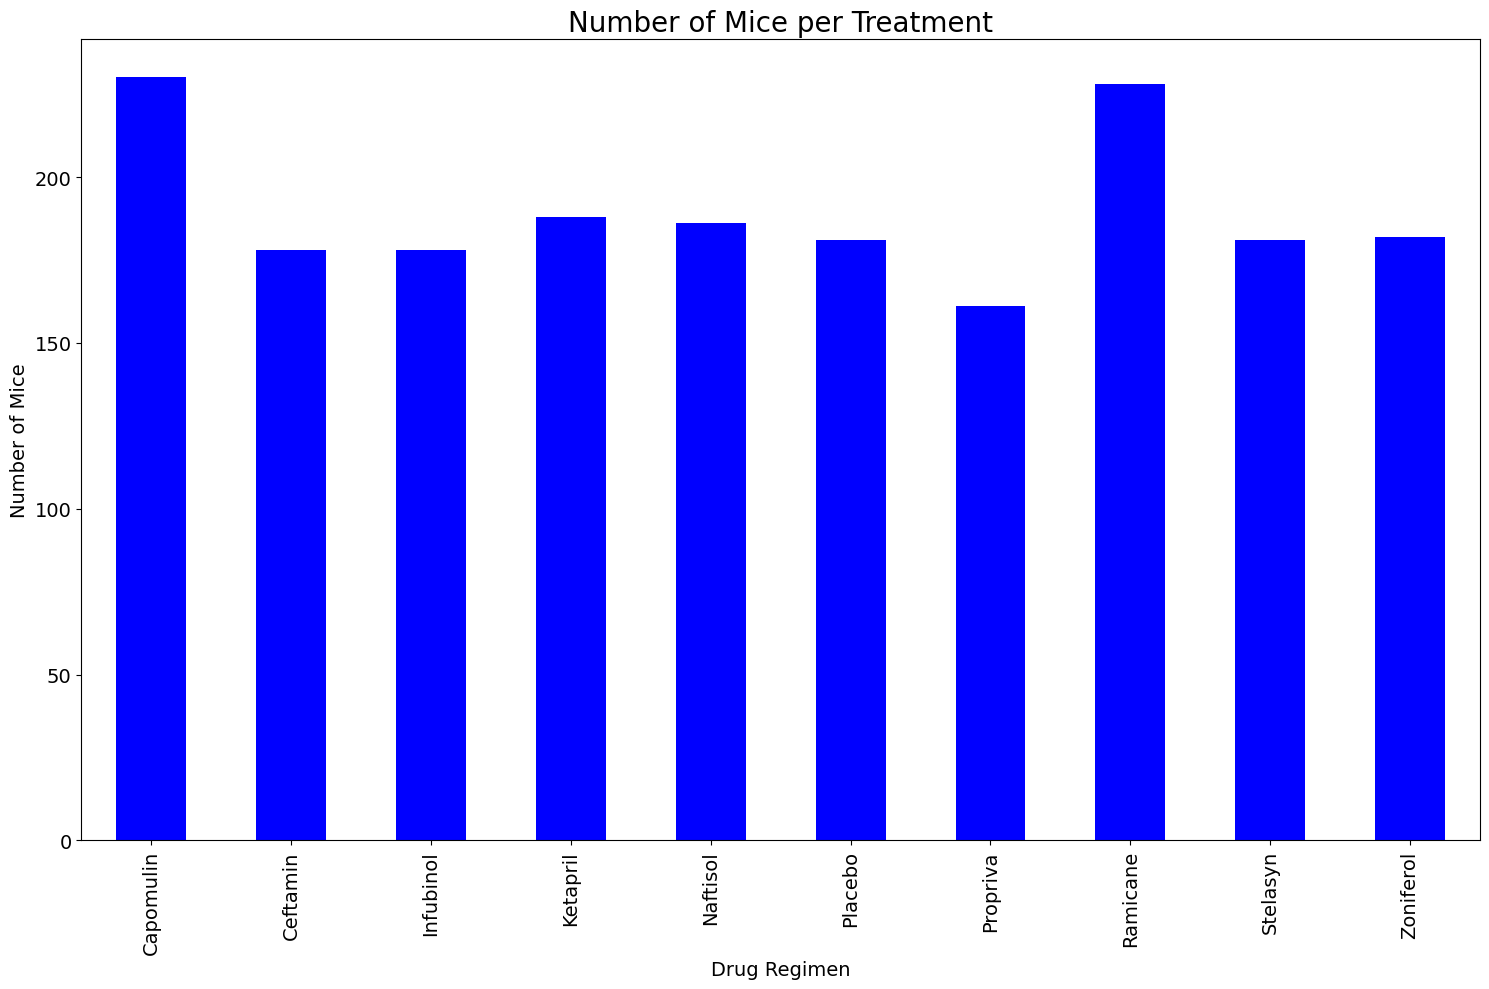

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [109]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

count_mice_per_tret = Combined_data.groupby(["Drug Regimen"]).count()["Mouse ID"] 


plot_pandas = count_mice_per_tret.plot.bar(figsize=(15,10), color='b',fontsize = 14)
count_mice_per_tret
plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Number of Mice",fontsize = 14)
plt.title("Number of Mice per Treatment",fontsize = 20)

plt.tight_layout()
plt.show()

count_mice_per_tret

In [110]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

#  Create an array that contains the number of mice each drug regimen has

mice_list =(Combined_data.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
mice_list

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

Text(0, 0.5, 'Number of Mice')

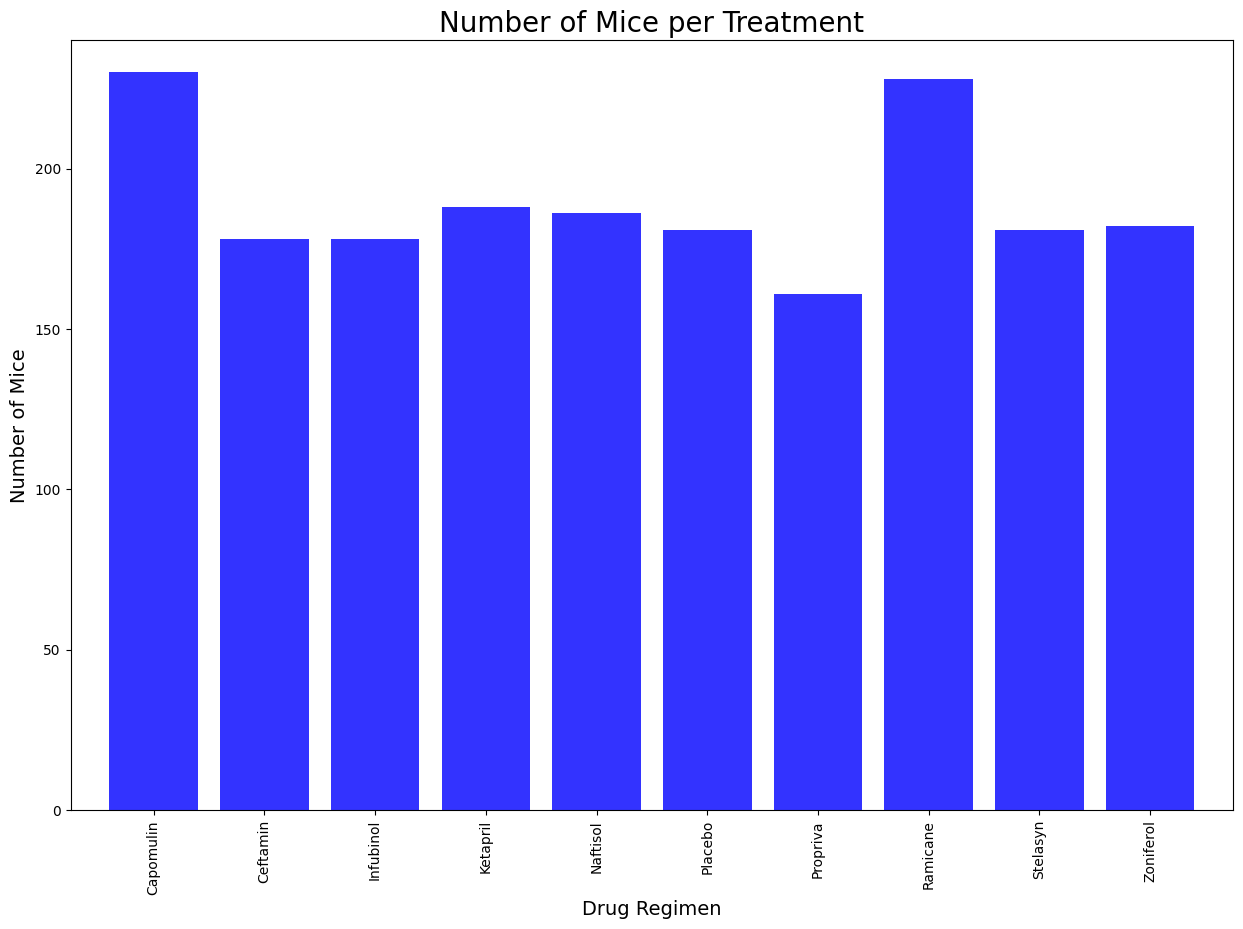

In [111]:
x_axis = np.arange(len(count_mice_per_tret))
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.bar(x_axis, mice_list, color='b', alpha=0.8, align='center')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(mice_list)+10)

plt.title("Number of Mice per Treatment",fontsize = 20)
plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Number of Mice",fontsize = 14)

In [112]:
#  Group by gender and get the number to plot
groupby_gender = Combined_data.groupby(["Mouse ID","Sex"])
groupby_gender
gender_df = pd.DataFrame(groupby_gender.size())

# Create the dataframe with total count of Female and Male mice
mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

# create and format the percentage of female vs male
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

# format the "Percentage of Sex" column
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]

# gender_df
mouse_gender

,Total Count,Percentage of Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


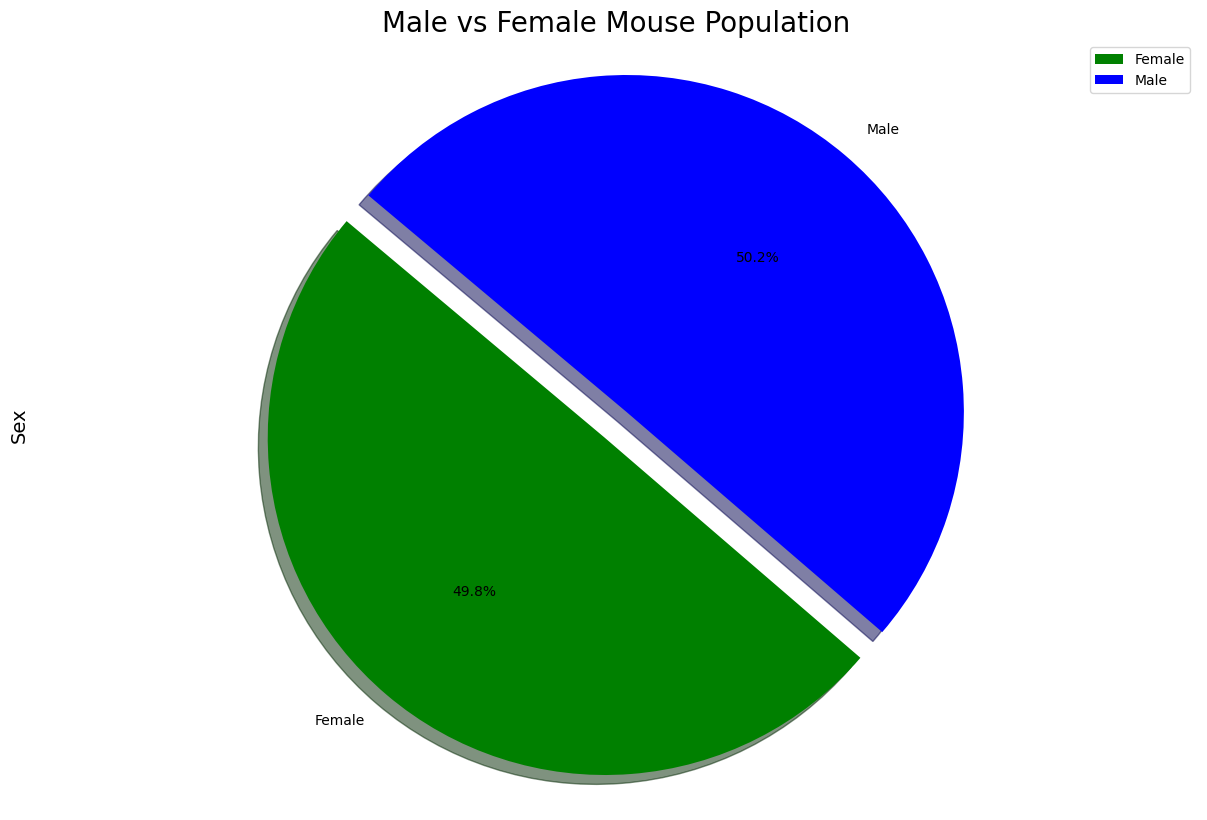

In [113]:
import matplotlib.pyplot as plt

# Assuming you have 'mouse_gender' DataFrame with 'Total Count' column
colors = ['green', 'blue']
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y='Total Count', figsize=(15, 10), colors=colors, startangle=140, explode=explode, shadow=True, autopct="%1.1f%%")

plt.title('Male vs Female Mouse Population', fontsize=20)
plt.ylabel('Sex', fontsize=14)
plt.xlabel('')  # Clear the default 'Sex' label on the x-axis

plt.axis("equal")  # To ensure that the pie chart is drawn as a circle
plt.show()

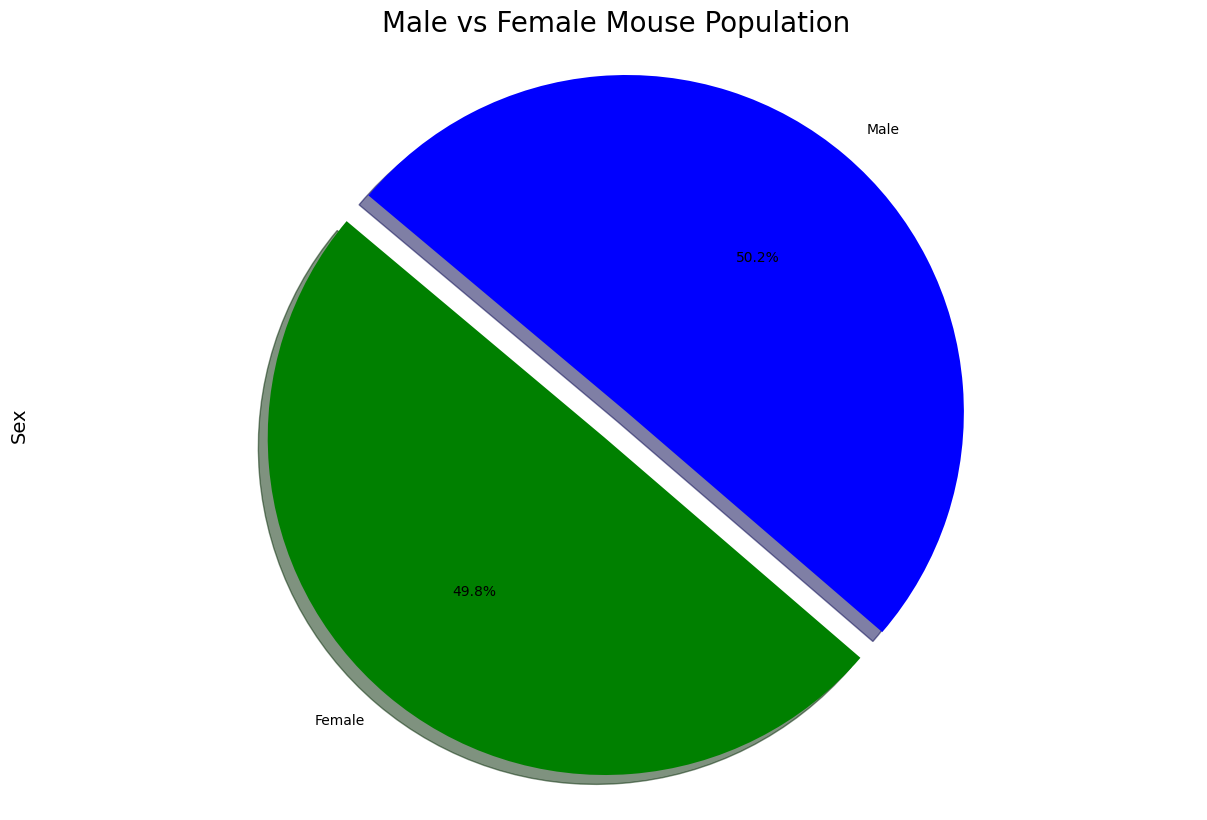

In [114]:
import matplotlib.pyplot as plt

# Create Labels for the sections of the pie
labels = ["Female", "Male"]

# List the values of each section of the pie chart
sizes = [49.799197, 50.200803]

# Set colors for each section of the pie
colors = ['green', 'blue']

# Determine which section of the circle to detach
explode = (0.1, 0)

# Create the pie chart based upon the values
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140,)
plt.title('Male vs Female Mouse Population', fontsize=20)
plt.ylabel('Sex', fontsize=14)
# Set equal axis
plt.axis("equal")

plt.show()

In [115]:
# Final tumor volume of each mouse across four of the most promising treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin. 
# Calculate the quartiles and IQR and quantitatively determine 
# if there are any potential outliers across all four treatment regimens.

Capomulin_df = Combined_data.loc[Combined_data["Drug Regimen"] == "Capomulin",:]
Ramicane_df = Combined_data.loc[Combined_data["Drug Regimen"] == "Ramicane", :]
Infubinol_df = Combined_data.loc[Combined_data["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = Combined_data.loc[Combined_data["Drug Regimen"] == "Ceftamin", :]

# Capomulin
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, Combined_data, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [116]:
# Capomulin quartiles and IQR
# Determine outliers using upper and lower bounds
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

quartiles =Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [117]:
# Ramicane

Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, Combined_data, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()
Ramicane_merge.to_csv("output.csv")

In [118]:
# Ramicane quartiles and IQR
# Determine outliers using upper and lower bounds
Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]

quartiles =Ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ramicane tumors is: {lowerq}")
print(f"The upper quartile of Ramicane tumors is: {upperq}")
print(f"The interquartile range of Ramicane tumors is: {iqr}")
print(f"The median of Ramicane tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumors is: 31.56046955
The upper quartile of Ramicane tumors is: 40.65900627
The interquartile range of Ramicane tumors is: 9.098536719999998
The median of Ramicane tumors is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [119]:
# Infubinol 
# Determine outliers using upper and lower bounds

Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, Combined_data, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [120]:
# Infubinol quartiles and IQR
# Determine outliers using upper and lower bounds
Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]

quartiles =Infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Infubinol tumors is: {lowerq}")
print(f"The upper quartile of Infubinol tumors is: {upperq}")
print(f"The interquartile range of Infubinol tumors is: {iqr}")
print(f"The median of Infubinol tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)


print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
Infubinol_merge.to_csv("output.csv")

The lower quartile of Infubinol tumors is: 54.04860769
The upper quartile of Infubinol tumors is: 65.52574285
The interquartile range of Infubinol tumors is: 11.477135160000003
The median of Infubinol tumors is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [121]:
# Ceftamin
Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, Combined_data, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [122]:
# Ceftamin quartiles and IQR
# Determine outliers using upper and lower bounds

Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]

quartiles = Ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of treatment is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of treatment is: 48.72207785
The upper quartile of temperatures is: 64.29983003
The interquartile range of temperatures is: 15.577752179999997
The the median of temperatures is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


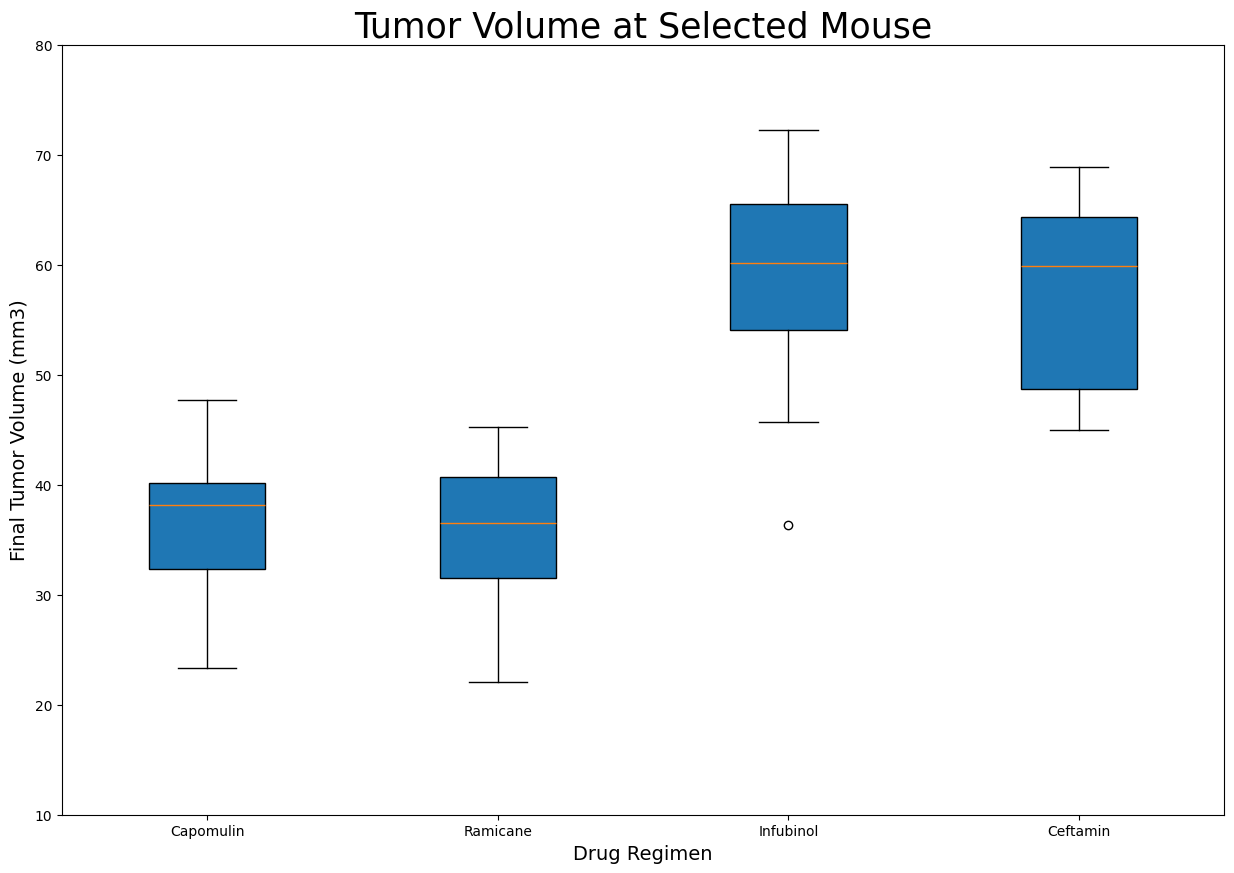

In [123]:
data_to_plot = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]
Regimen= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title('Tumor Volume at Selected Mouse',fontsize =25)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 14)
ax1.set_xlabel('Drug Regimen',fontsize = 14)
ax1.boxplot(data_to_plot, labels=Regimen, widths = 0.4, patch_artist=True,vert=True)

plt.ylim(10, 80)


plt.show()

In [124]:
forline_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "b742",:]
forline_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
290,b742,Capomulin,Male,7,21,0,45.000000,0
291,b742,Capomulin,Male,7,21,5,41.534097,0
292,b742,Capomulin,Male,7,21,10,41.999228,0
293,b742,Capomulin,Male,7,21,15,39.524843,0
294,b742,Capomulin,Male,7,21,20,37.950355,0


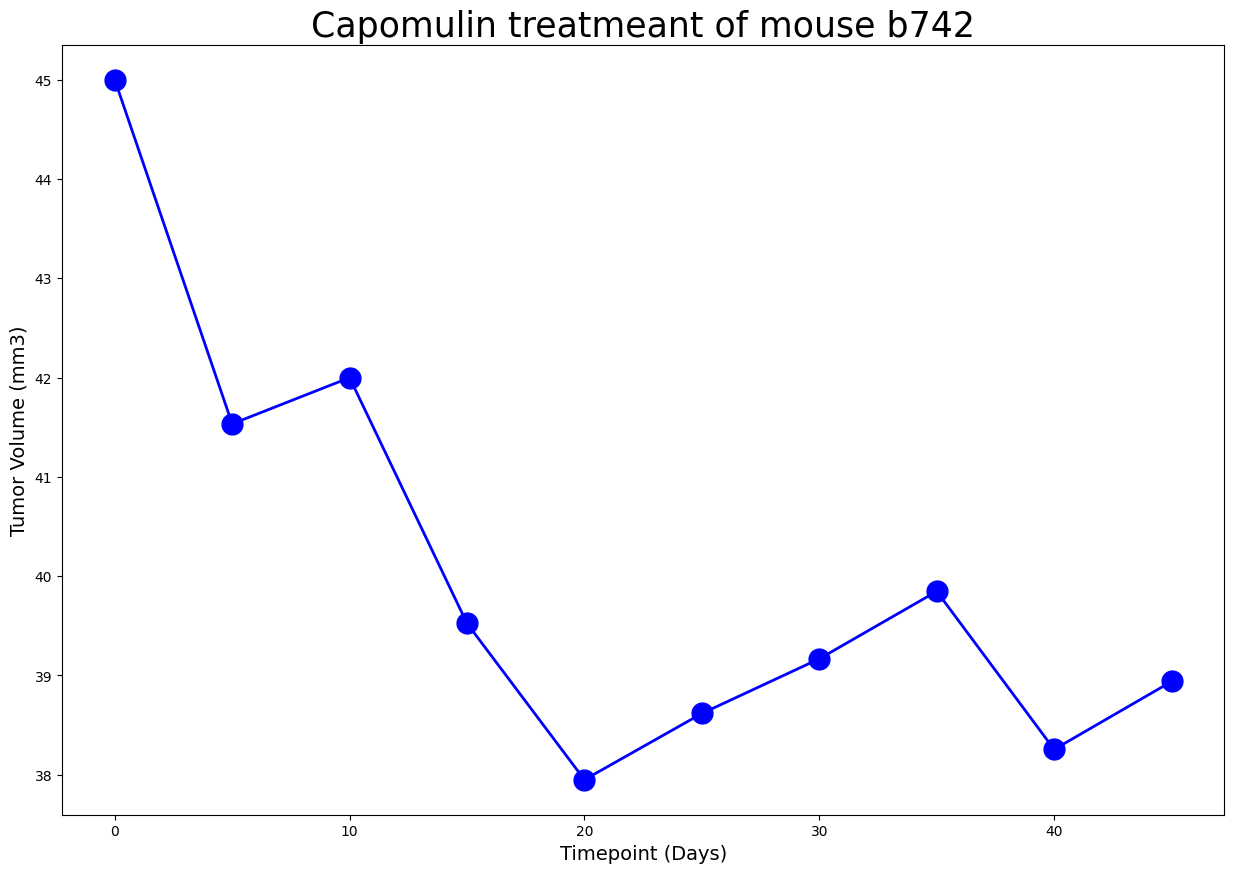

In [125]:
x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.title('Capomulin treatmeant of mouse b742',fontsize =25)
plt.plot(x_axis, tumsiz,linewidth=2, markersize=15,marker="o",color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)',fontsize =14)
plt.ylabel('Tumor Volume (mm3)',fontsize =14)


plt.show()

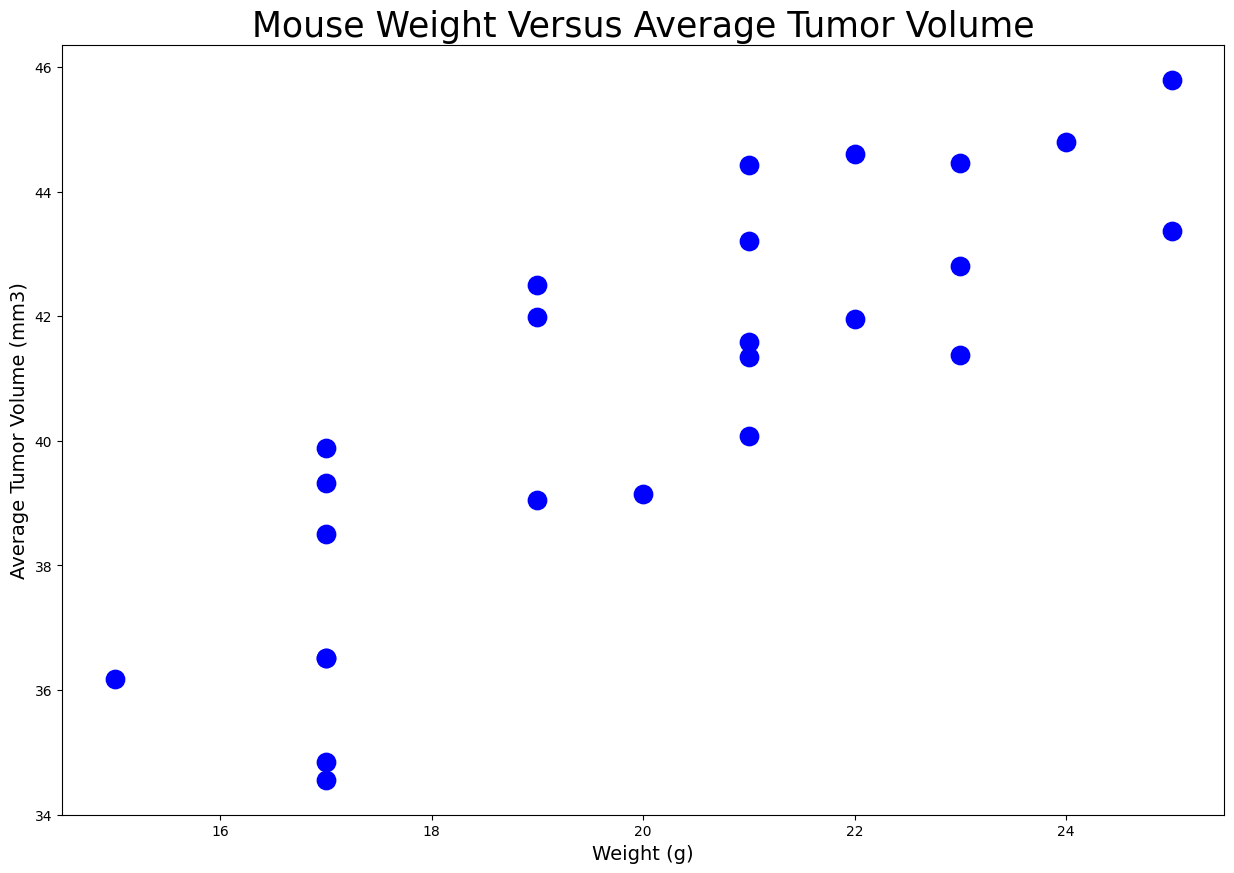

In [130]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.
fig1, ax1 = plt.subplots(figsize=(15, 10))

# Select only numeric columns for mean calculation
numeric_cols = ['Weight (g)', 'Tumor Volume (mm3)']
avg_capm_vol = Capomulin_df.groupby(['Mouse ID'])[numeric_cols].mean()

marker_size = 15
plt.scatter(avg_capm_vol['Weight (g)'], avg_capm_vol['Tumor Volume (mm3)'], s=175, color="blue")
plt.title('Mouse Weight Versus Average Tumor Volume', fontsize=25)
plt.xlabel('Weight (g)', fontsize=14)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=14)

plt.show()

In [131]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

The correlation between mouse weight and average tumor volume is 0.84


In [132]:
x_values = avg_capm_vol['Weight (g)']
y_values = avg_capm_vol['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{corr}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

slope:0.9544396890241049
intercept:21.552160532685008
rvalue (Correlation coefficient):0.8419363424694721
pandas (Correlation coefficient):0.84
stderr:0.12754359033201323
y = 0.95x + 21.55


slope: 0.9544396890241049
intercept: 21.552160532685008
rvalue (Correlation coefficient): 0.8419363424694721
stderr: 0.12754359033201323
The r-squared is: 0.7088568047708723


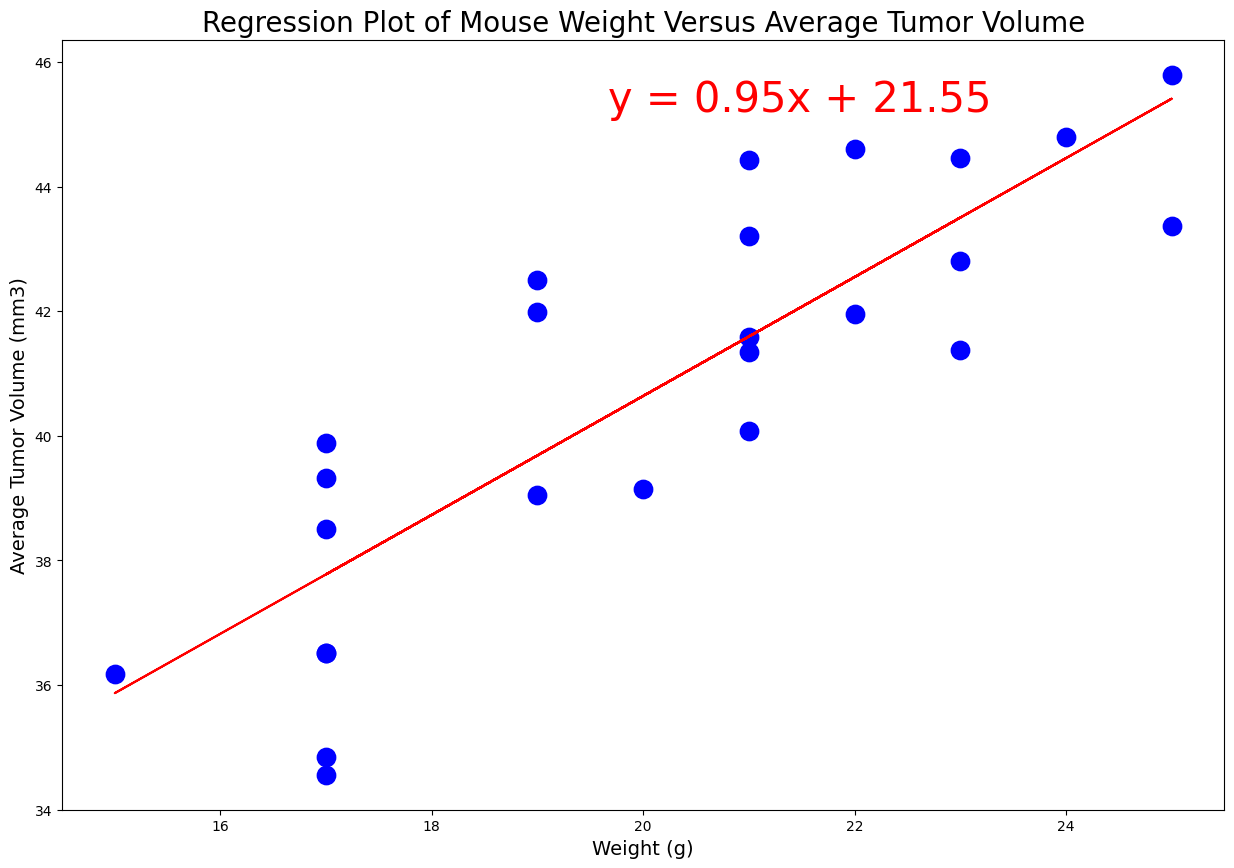

In [133]:
# Define x_values and y_values
x_values = avg_capm_vol['Weight (g)']
y_values = avg_capm_vol['Tumor Volume (mm3)']

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Print regression information
print(f"slope: {slope}")
print(f"intercept: {intercept}")
print(f"rvalue (Correlation coefficient): {rvalue}")
print(f"stderr: {stderr}")

# Plot the scatter plot and regression line
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.scatter(x_values, y_values, s=175, color="blue")
plt.plot(x_values, regress_values, "r-")
plt.title('Regression Plot of Mouse Weight Versus Average Tumor Volume', fontsize=20)
plt.xlabel('Weight (g)', fontsize=14)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=14)
plt.annotate(line_eq, xy=(20, 40), xycoords='data', xytext=(0.8, 0.95),
             textcoords='axes fraction', horizontalalignment='right',
             verticalalignment='top', fontsize=30, color="red")

# Print the r-squared value
print(f"The r-squared is: {rvalue**2}")

plt.show()